## Drugs Arrested Case

### จำนวนคดีผู้ต้องหายาเสพติด และปัญจัยที่ส่งผลต่อปัญหายาเสพติด
#### by กลุ่ม ทุกปัญหามีทางเข้าเสมอ
รายชื่อสมาชิก

6441142126 ปัญญชาติ พ่อค้าทอง

6441039226 ชญานิษฐ์ มีทองจันทร์

6441100826 ธัญพิชา นพจินดา

---


In [1]:
import pandas as pd
import numpy as np
import requests
import json, io, time, urllib3, re
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact
import plotly.express as px
urllib3.disable_warnings()

เกริ่นเรื่องปัญหายาเสพติดในไทย

- ### แถว่างงาน 
- ### ตรวจคำต่างๆ 
- ### reference
---

- จำนวนคดีเคส เรียงตามจังหวัด เอาปีล่าสุด - เลือกจังหวัดแสดงผลได้
- ดูเทรนด์ rank top 3 แต่ละปี
- เอาจังหวัดที่น่าสนใจ(สถิติอยู่ในท็อป3บ่อย) ex.นครศรีธรรมราช กรุงเทพ ปทุม สงขลา ขอนแก่น
- ประชากรหนาแน่น ex.กรุงเทพ ขอนแก่น
- ดูเรื่องนักท่องเที่ยว ฟีลเมืองเศรษฐกิจ ex.ชลบุรี
- หัวข้อภาคใต้ เน้นนครศรี + เรื่องกระท่อม + อาชญากรรมอื่น
- การกินเหล้า & เล่นยาสวนทางกัน

### <u>Overview</u>

ปัญหายาเสพติดเป็นเหมือนโรคเรื้อรังที่กัดกินอนาคตของชาติไทยมานานหลายทศวรรษ แม้จะมีความพยายามจากทุกภาคส่วนในการแก้ไข แต่ปัญหานี้ยังคงฝังรากลึกในสังคมไทย

วันนี้กลุ่มของพวกเราจะมานำเสนอข้อมูลเกี่ยวกับยาเสพติด และเน้นไปที่จำนวนคดีผู้ต้องหาคดียาเสพติดในแต่ละจังหวัด โดยจะใช้ตัวเลขคดีนี้เป็นตัวแทนสื่อถึงปัญหายาเสพติดในแต่ละพื้นที่ 

พร้อมกับค้นหาว่าปัจจัยใดบ้างที่อาจส่งผลต่อจำนวนความมากน้อยของปัญหายาเสพติด รวมไปถึงหยิบยก insights ที่น่าสนใจ ซึ่งเป็นสาเหตุที่ซ่อนอยู่ในตัวเลขยอดคดียาเสพติดของบางจังหวัดมานำเสนอเพิ่มเติม

*หมายเหตุ ข้อมูลจำนวนคดีผู้ต้องหาคดียาเสพติดเป็นเพียงตัวเลขหนึ่งที่สะท้อนถึงปัญหายาเสพติด ว่ามีมากน้อยเพียงใด มิใช่ตัวเลขที่เป็นตัวแทนสะท้อนข้อมูลออกมาได้ทั้งหมด 

---


Reference

จำนวนคดีผู้ต้องหาคดียาเสพติด

- main page: https://data.go.th
- source: https://data.oncb.go.th/casePer
- as of 14-Feb-2024

### <u>จำนวนคดีผู้ต้องหาคดียาเสพติด เรียงตามจังหวัด ปี 2565 </u>


In [2]:
df = pd.read_csv("./data/arrested_drug_cases.csv", encoding = "utf8")
df["budgetYear"] = df["budgetYear"].astype(str)

df_prov_th_en = pd.read_csv("./data/province_th_en.csv", encoding = "utf8")
df = pd.merge(df, df_prov_th_en, on='PROV_NAME', how='left').copy()

- bar chart แสดงเปรียบเทียบ 10 จังหวัดที่มีจำนวนคดียาเสพติดสูงสุด ในปี 2565

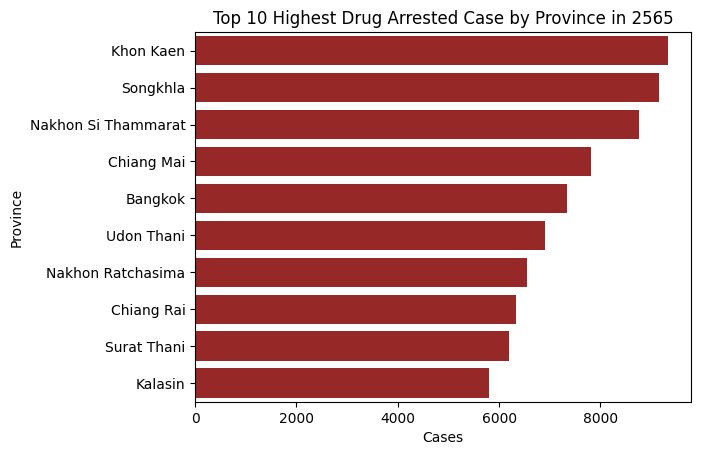

In [3]:
YEAR = "2565"
df_cases = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en',]][df["budgetYear"] == YEAR].copy()
df_cases.sort_values("arrestAll_case", ascending = False, inplace = True)

df_top_x = df_cases[:10]

sns.barplot(
    data = df_top_x,
    x = "arrestAll_case",
    y = "prov_en",
    palette = ["#a91616" for _ in range(len(df_top_x))], # just to eliminate the warning
    hue = "prov_en", # just to eliminate the warning
)

plt.xlabel("Cases")
plt.ylabel("Province")
plt.title(f"Top 10 Highest Drug Arrested Case by Province in {YEAR}")
plt.show()

ในปี พ.ศ.2565 จังหวัด ขอนแก่น สงขลา และนครศรีธรรมราชมีจำนวนคดีสูงมากเกินกว่า 8,000 คดี ซึ่งนับเป็นจำนวนไม่น้อย และเราต้องพึงระลึกไว้ว่านี้เป็นแค่จำนวนของการที่ตรวจพบและจับกุมได้เท่านั้น ในความเป็นจริงปัญหานั้นมีมากไปกว่าตัวเลขที่ทางเรานำเสนอออกมา

อย่างไรก็ตาม ทางกลุ่มของเราได้ไปหาเหตุผลเบื้องต้นในบางจังหวัดที่อาจสื่อได้ว่าทำไมจังหวัดเหล่านี้ถึงมีปัญหา มีจำนวนคดีผู้ต้องหายาเสพติดจำนวนมาก

เช่น 

<u>จังหวัดสงขลา</u>
   
มีช่องทางสำหรับการลักลอบนำเข้ายาเสพติดจำนวนมาก ทั้งด่านที่เป็นด่านศุลการกร ด่านตรวจคนเข้าเมือง จุดตรวจพรมแดนต่างๆ รวมถึงมีช่องทางธรรมชาติ และยังเป็นจังหวัดที่มีชายแดนติดกับประเทศมาเลเซียด้วย สามารถเข้าออกประเทศกันได้ง่าย รวมถึงมีการปลูกพึชเสพติดกันเอง ทำให้มีปริมาณยาเสพติดอยู่ในจังหวัดมาก ง่ายต่อการเข้าถึง

<u>จังหวัดขอยแก่น</u>

จังหวัดขอนแก่นนับเป็นหนึ่งในจังหวัดที่พยายามอย่างจริงจังในการปราบปรามยาเสพติด อย่างไรก็ตามในช่วงที่ผ่านมาก็มีข่าวที่เจ้าหน้าที่รัฐนั้นกลับกลายเป็นคนที่เข้าไปยุ่งเกี่ยวกับยาเสพติดเอง ??
      

- แยกดูรายจังหวัดทุกปีได้

    ผู้อ่านสามารถดูสถิติจำนวนคดีผู้ต้องหาตลอดเวลา ปีพ.ศ.2557-2565 แยกในแต่ละจังหวัดได้

In [16]:
df_interact_prov = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en']].copy()
provinces = sorted(df_interact_prov["PROV_NAME"].unique().tolist())

@interact
def bar_by_province(province = provinces):
    data = df_interact_prov[df["PROV_NAME"] == province]

    # average 2 years prior and after to fill the missing value
    avg = data[data["budgetYear"].isin(["2557", "2558", "2560", "2561"])]["arrestAll_case"].mean()
    data.loc[data["arrestAll_case"] == 0, "arrestAll_case"] = avg.astype(int)

    sns.barplot(
        data = data,
        x = "budgetYear",
        y = "arrestAll_case",
        palette = ["#a91616" for _ in range(len(data))], # just to eliminate the warning
        hue = "budgetYear", # just to eliminate the warning
    )

    prov_en = data["prov_en"].iloc[0]

    plt.ylabel("Cases")
    plt.xlabel("Year")
    plt.title(f"Number of Cases over the time in {prov_en}")

interactive(children=(Dropdown(description='province', options=('กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสิ…

### <u>Top 3 Province with Highest Drugs Arrested Case </u>

In [5]:
Top3 = df[["budgetYear", "PROV_NAME", "arrestAll_case"]].copy()
Top3["arrestAll_case"] = Top3["arrestAll_case"].astype(int)
Top3['rank'] = Top3.groupby(["budgetYear"])['arrestAll_case'].rank(method='min', ascending = False).copy()
RankTop3 = Top3[["budgetYear", "PROV_NAME", "arrestAll_case", "rank"]].copy()
RankTop3.columns = ["budgetYear", "province", "cases", "rank"]

@interact 
def filter_year(year=RankTop3["budgetYear"].unique()): 
    return RankTop3[RankTop3["budgetYear"]== year].sort_values(["budgetYear", "rank"])[["rank", "province", "cases"]].reset_index(drop = True)

interactive(children=(Dropdown(description='year', options=('2557', '2558', '2559', '2560', '2561', '2562', '2…

จากการเรียงลำดับ rank คดีผู้ต้องหายาเสพติดข้างต้น ทำให้สามารถเปรียบเทียบได้ว่าในแต่ละปี จังหวัดที่มีจำนวนคดียาเสพติดสูงสุดและต่ำสุดคือจังหวัดอะไรบ้าง และเราได้นำแต่ละจังหวัดที่มีความน่าสนใจนี้มาหาปัจจัยที่ส่งผลต่อปัญหายาเสพติดในลำดับต่อไป

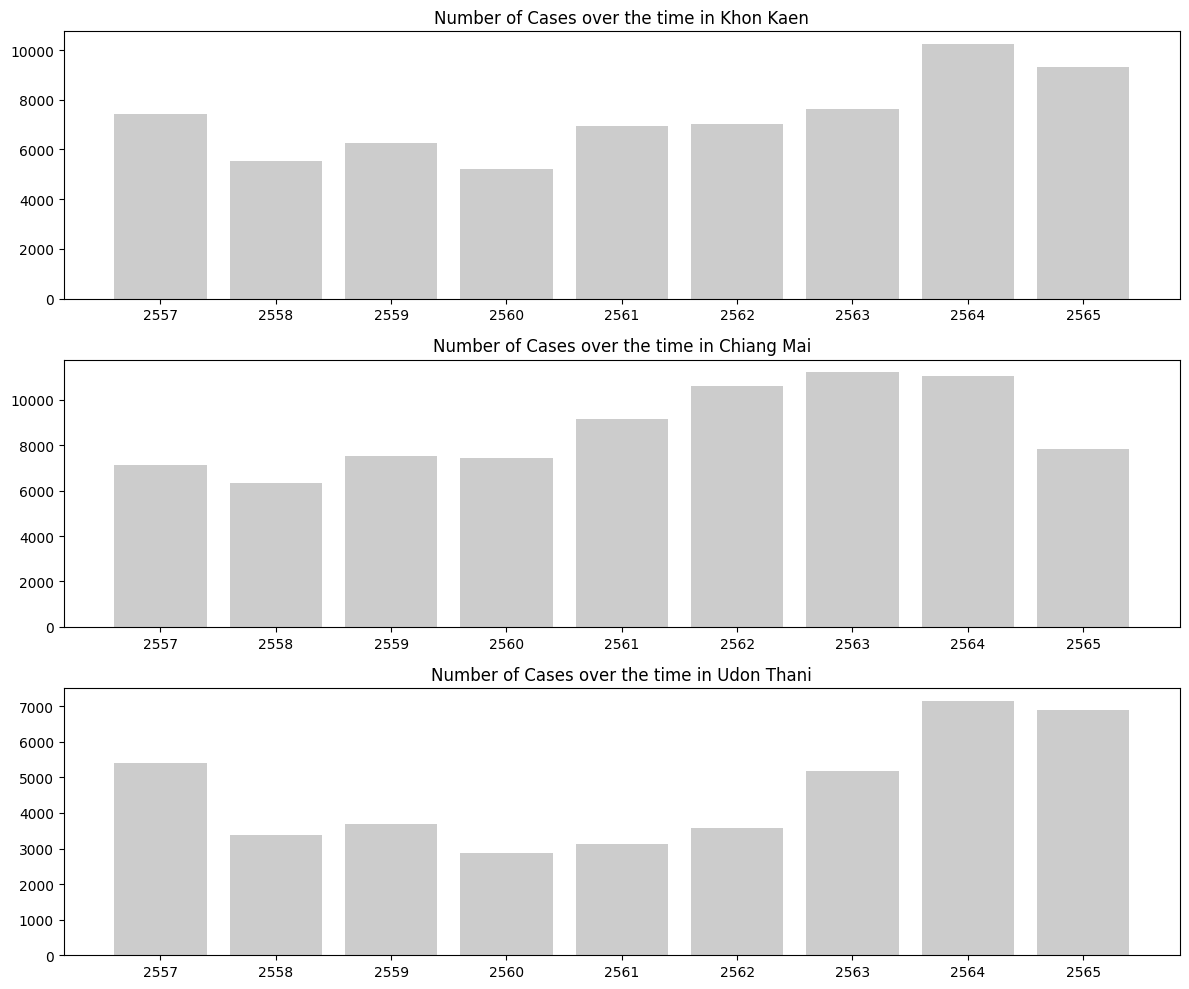

In [81]:
focus_provinces = ["ขอนแก่น", "เชียงใหม่", "อุดรธานี"]
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 10))
for idx, province in enumerate(focus_provinces):
    data = df_interact_prov[df["PROV_NAME"] == province]
    avg = data[data["budgetYear"].isin(["2557", "2558", "2560", "2561"])]["arrestAll_case"].mean()
    data.loc[data["arrestAll_case"] == 0, "arrestAll_case"] = np.round(avg).astype(int)
    axes[idx].bar(
        data = data,
        x = "budgetYear",
        height = "arrestAll_case",
        color = ["#cccccc"]
    )
    prov_en = data["prov_en"].iloc[0]
    axes[idx].set_title(f"Number of Cases over the time in {prov_en}")
plt.tight_layout()

สุดท้ายนี้หากสังเกตดูจังหวัดไหนที่มีจำนวนคดีเยอะเช่น จังหวัดขอนแก่น จังหวัดเชียงใหม่ และจังหวัดอุดรธานี ตามที่แสดงในกราฟ จะเห็นได้ว่ามีจำนวนคดีที่สูงมาโดยตลอด และมักจะมีแนวโน้มสูงขึ้นเรื่อย ๆ ซึ่งทั้ง 3 จังหวัดนี้ต่างมีจุดร่วมกันที่ปัจจัยหลายอย่าง ทั้งเรื่องการเป็นจังหวัดที่มีความหนาแน่นของประชากรค่อนข้างสูง และเป็นจังหวัดที่ดึงดูดนักท่องเที่ยวจำนวนมากทั้งในและต่างประเทศ จึงนำไปสู่การนำปัจจัยร่วมเหล่านี้มาศึกษาต่อกับจังหวัดอื่น ๆ ในประเทศไทย ว่ามีความเกี่ยวเนื่องส่งผลต่อจำนวนคดียาเสพติดมากน้อยเพียงใด

### <u>ปัจจัยที่ส่งผลต่อปัญหายาเสพติด</u>
หลังจากได้เห็นตัวเลขของจำนวนผู้ต้องหาคดียาเสพติดไปในข้างต้นแล้ว 
ทางกลุ่มของเราจะพาไปค้นหาและดูปัจจัยต่างๆ ว่าสิ่งใดบ้างที่เป็นสาเหตุ เป็นปัจจัยของปัญหายาเสพติด  

- #### <u>ปัจจัยความหนาแน่นประชากร</u>

Reference

สถิติจำนวนประชากรแยกรายพื้นที่

- main page: 
- source: 
- as of 17-Feb-2024

รายชื่อจังหวัดของประเทศไทยเรียงตามพื้นที่

- main page: 
- source: 
- as of 17-Feb-2024

In [1]:
df_pop = pd.read_csv("./data/thailand_population_by_prov_year.csv")
df_pop = df_pop[df_pop["lsyymm"].astype(str).str.contains(r"^64")]
df_pop = df_pop[["lsccDesc", "lssumtotTot"]].copy()
df_pop.columns = ["province", "population"]
df_pop["province"] = df_pop["province"].str.replace("จังหวัด", "").copy()

df_area = pd.read_csv("./data/prov_area.csv", encoding = "utf8")
df_area.drop("Unnamed: 0", axis = 1, inplace = True)
df_area.columns = ["province", "area"]

df_density = pd.merge(left = df_pop, right = df_area, how = "left")
df_density["area"] = df_density["area"].apply(lambda x: re.sub(r"\[\d+(?!,)\]", "", x.replace(",", ""))).astype(float).copy()
df_density["density"] = round(df_density["population"] / df_density["area"])

with open("./data/provinces.geojson", encoding="utf8") as geo:
    geojson = json.load(geo)

state_id = {}
for feature in geojson["features"]:
    feature["id"] = feature["properties"]["pro_code"]
    state_id[feature["properties"]["pro_th"]] = feature["id"]

df_density["id"] = df_density["province"].apply(lambda x: state_id[x])
df_density["density_scale"] = np.log10(df_density["density"]).round(2)

fig = px.choropleth(
    geojson = geojson,
    data_frame = df_density,
    locations = "id",
    hover_name = "province",
    hover_data = "density",
    color = "density_scale",
    scope = "asia",
    color_continuous_scale="orrd",
)
fig.update_geos(fitbounds = "locations", visible = False)
fig.show()

NameError: name 'pd' is not defined

- Correlation

In [7]:
tmp1 = df_cases[["PROV_NAME", "arrestAll_case"]].copy()
tmp1.columns = ["province", "cases"]
tmp2 = df_density[["province", "density"]].copy()

df_corr = pd.merge(left = tmp1, right = tmp2, on = "province", how = "left").copy()
df_corr.sort_values("cases", ascending = False)[["cases", "density"]].corr()

,cases,density
cases,1.000000,0.182731
density,0.182731,1.000000


ในตอนแรกทางกลุ่มของเราตั้งสมมติฐานว่า "ความหนาแน่นของประชากร" เป็นปัจจัยหลักที่ส่งผลต่อปัญหายาเสพติด เพราะเห็นตัวอย่างชุมชนแออัดในกรุงเทพ เช่น ชุมชนคลองเตย ที่มักมีปัญหาการแพร่ระบาดของยาเสพติด

แต่หลังจากทำแผนที่ความหนาแน่นของประชากรในแต่ละจังหวัด และเปรียบเทียบกับจำนวนคดีผู้ต้องหายาเสพติด กลับพบว่า ทั้งสองไม่มีความสัมพันธ์ที่ชัดเจนหรือมีนัยยะสำคัญ

- #### <u>ปัจจัยทางเศรษฐกิจ การท่องเที่ยว</u>

Reference

จังหวัดที่มีชาวต่างชาติมาเยือนมากที่สุด 10 อันดับ ปี 2565

- main page: 
- source: 
- as of 18-Feb-2024

10 จังหวัด นักท่องเที่ยวสูงสุด ปี 2565

- main page: 
- source: 
- as of 18-Feb-2024

In [2]:
#รายชื่อจังหวัดที่มีชาวต่างชาติมาเยือนมากสุด ปี 2565 https://www.thaipbs.or.th/news/content/322587
df_foreign = pd.read_csv("./data/อันดับจังหวัดที่มีชาวต่างชาติมาเยือน.csv",skiprows=1,skipfooter=2)
df_foreign.set_index('ลำดับที่',inplace = True)
df_foreign

NameError: name 'pd' is not defined

In [9]:
# 10 จังหวัดนักท่องเที่ยวสูงสุด ปี 2565 https://www.thaipbs.or.th/now/infographic/56
df_tourist = pd.read_csv("./data/10จังหวัดนักท่องเที่ยวสูงสุด.csv")
df_tourist.set_index('ลำดับที่',inplace = True)
df_tourist

,จังหวัด,จำนวน (ล้านคน)
ลำดับที่,,
1,กรุงเทพ,30.80
2,ชลบุรี,10.79
3,กาญจนบุรี,9.34
4,ประจวบคีรีขันธ์,7.70
5,เพชรบุรี,7.28
6,เชียงใหม่,6.67
7,อยุธยา,6.26
8,นครราชสีมา,4.85
9,ภูเก็ต,4.08



ประเทศไทยนั้นนับว่าเป็นประเทศแห่งการท่องเที่ยว และการท่องเที่ยวก็เป็นแหล่งที่มาของรายได้ที่สำคัญของประเทศไทย
แต่ทว่าการเติบโตของธุรกิจท่องเที่ยวที่มากและเร็ว จนบางทีไม่สามารถควบคุมให้อยู่ภายใต้กรอบกฎหมายได้ทั้งหมด

#### ผลการวิเคราะห์
ถ้าดูข้อมูลจากตารางด้านบน จะเห็นว่าบางจังหวัดที่มีความโดดเด่นในเรื่องการท่องเที่ยว เช่น กรุงเทพ เชียงใหม่ เชียงราย สงขลา นครราชสีมา สุราษฎร์ธานี ก็อยู่ในอันดับของจังหวัดที่มีคดียาเสพติดสูงสุด 10 อันดับ ในปี 2565

ซึ่งการท่องเที่ยวก็ <u>เป็นหนึ่งในสาเหตุที่ทำให้ปัญหายาเสพติดเพิ่มมากขึ้นได้</u>  เพราะ
ในบางพื้นที่เลือกที่ธุรกิจก็เลือกใช้การท่องเที่ยวแบบด้อยคุณภาพ เน้นใช้สถานบันเทิง กิจกรรมโชว์ที่ลามกอนาจาร รวมไปถึงยาเสพติด สิ่งมึนเมา มาเป็นสิ่งดึงดูดนักท่องเที่ยวโดยเฉพาะนักท่องเที่ยวประเภทสุขนิยม 

แต่เราก็ไม่สามารถโยนความผิดในเรื่องของปัญหายาเสพติดไปให้การท่องเที่ยวเพียงอย่างเดียว เพราะบางจังหวัดที่ปัญหายาเสพติดระบาดอย่างรุนแรงนั้นก็เกิดจากคนในพื้นที่นั้นเอง

และอีกหนึ่งข้อสังเกตุคือจังหวัด ภูเก็ต ซึ่งเป็นจังหวัดท่องเที่ยวที่นิยมที่สุดของชาวต่างชาติ ยังเป็นจังหวัดที่ตัวเลขจำนวนคดีน้อยกว่าอีกหลายๆจังหวัดในประเทศไทย 

#### ข้อเสนอแนะ
โดยทางกลุ่มของเรามีข้อเสนอแนะที่จะสามารถบรรเทาปัญหายาเสพติดที่เป็นผลกระทบมาจากการท่องเที่ยว 
- องค์กรต่างๆ และคนในพื้นที่ร่วมกันฟื้นฟูแหล่งท่องเที่ยวตามธรรมชาติ 
- ภาครัฐเอาจริงเอาจัง และมีมาตรการที่เข้มงวดขึ้น ในการควบคุมละปราบปรามสถานที่ท่องเที่ยวไม่พึงประสงค์ รวมไปถึงการคัดกรองนักท่องเที่ยว
- ร่วมกันนำเสนอภาพลักษณ์ เอกลักษณ์ วัฒนธรรมที่ดีงามของไทยเป็นตัวดึงดูดให้นักท่องเที่ยวเข้ามาในประเทศเรา ไม่ใช่สถานบันเทิง

ถึงแม้แนวทางนี้อาจจะทำให้นักท่องเที่ยวที่มองหาสิ่งเหล่านี้ไม่พอใจ และอาจทำให้ตัวเลขนักท่องเที่ยวลดลง แต่ในระยะยาวเชื่อว่าจะมีนักท่องเที่ยวประเภทที่อยากมาเพื่อความงามของธรรมชาติ เรียนรู้ประเพณีวัฒนธรรม ความงดงามในแบบไทยๆ เข้ามาแทนที่กลุ่มคนเหล่านั้นได้



- #### <u>ปัจจัยจำนวนผู้ว่างงาน</u>

Reference 

ชื่อ

- main page: 
- source: 
- as of -Feb-2024

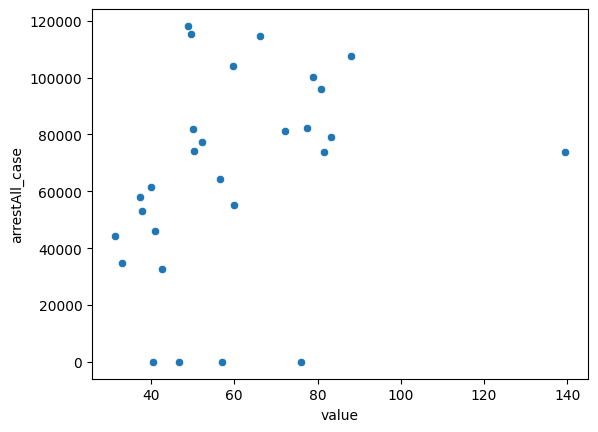

In [10]:
def assign_reg(prov, th_reg):
    for region, prov_list in th_reg.items():
        if prov in prov_list:
            return region

thailand_regions = {
    "ภาคกลาง": ["กรุงเทพมหานคร", "ชัยนาท", "นนทบุรี", "ปทุมธานี", "พระนครศรีอยุธยา","ลพบุรี","สมุทรปราการ","สระบุรี","สิงห์บุรี","อ่างทอง","กาญจนบุรี","นครปฐม","ประจวบคีรีขันธ์","เพชรบุรี","ราชบุรี","สมุทรสงคราม","สมุทรสาคร","สุพรรณบุรี","อุทัยธานี","อยุธยา"],
    "ภาคเหนือ": ["เชียงราย","เชียงใหม่","น่าน","พะเยา","แพร่","แม่ฮ่องสอน","ลำปาง","ลำพูน","กำแพงเพชร","ตาก","นครสวรรค์","พิจิตร","พิษณุโลก","เพชรบูรณ์","สุโขทัย","อุตรดิตถ์"],
    "ภาคตะวันออกเฉียงเหนือ": ["กาฬสินธุ์","ขอนแก่น","ชัยภูมิ","นครพนม","บึงกาฬ","มหาสารคาม","มุกดาหาร","ร้อยเอ็ด","เลย","สกลนคร","หนองคาย","หนองบัวลำภู","อุดรธานี","อำนาจเจริญ","บุรีรัมย์","ยโสธร","ศรีสะเกษ","สุรินทร์","อุบลราชธานี","จันทบุรี","ฉะเชิงเทรา","ชลบุรี","ตราด","นครนายก","ปราจีนบุรี","ระยอง","สระแก้ว"],
    "ภาคใต้": ["กระบี่","ชุมพร","ตรัง","นครศรีธรรมราช","นราธิวาส","ปัตตานี","พะเยา","พังงา","ภูเก็ต","ระนอง","สงขลา","สตูล","สุราษฎร์ธานี","ยะลา"],
}

df_unemploy = pd.read_csv("./data/จำนวนผู้ว่างงาน.csv")
df_unemploy.drop("_id", axis = 1, inplace = True)
df_unemploy["year"] = df_unemploy["year"].astype(str)
df_unemploy = df_unemploy[df_unemploy["year"].astype(int) >= 2557].groupby(["year", "region"])["value"].mean().to_frame().reset_index().copy()

df_cases_new = df[["budgetYear", "PROV_NAME", "arrestAll_case"]].copy()
df_cases_new["region"] = df_cases_new.loc[:, "PROV_NAME"].apply(lambda x: assign_reg(x, thailand_regions))
df_cases_new = df_cases_new[df_cases_new["budgetYear"].astype(int) <= 2563].copy().reset_index(drop = True)
df_cases_new = df_cases_new.groupby(["budgetYear", "region"])["arrestAll_case"].sum().reset_index()

df_scatter = pd.merge(left = df_unemploy, right = df_cases_new, left_on = ["year", "region"], right_on=["budgetYear", "region"])
sns.scatterplot(
    data = df_scatter,
    x = "value",
    y = "arrestAll_case"
);

Text(0, 0.5, 'Unemployment rate')

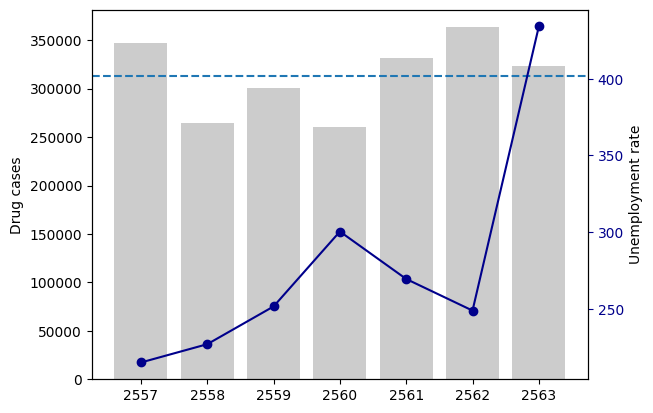

In [91]:
df_unemploy = df_unemploy[df_unemploy["region"] == "ทั่วประเทศ"].copy()
df_cases_overtime = df[["budgetYear", "arrestAll_case"]].copy()
df_cases_overtime = df_cases_overtime.groupby("budgetYear")["arrestAll_case"].sum().reset_index().copy()
avg = df_cases_overtime[df_cases_overtime["budgetYear"].isin(["2557", "2558", "2560", "2561"])]["arrestAll_case"].mean()
df_cases_overtime.loc[df_cases_overtime["arrestAll_case"] == 0, "arrestAll_case"] = avg.astype(int)
df_unemp_cases = pd.merge(left = df_unemploy, right = df_cases_overtime, left_on = "year", right_on = "budgetYear", how = "left")
avg = df_unemp_cases["arrestAll_case"].mean()

fig, ax1 = plt.subplots()
ax1.bar(df_unemp_cases["year"], df_unemp_cases["arrestAll_case"], color = "#cccccc")
ax1.set_ylabel("Drug cases")
ax1.axhline(y = avg, linestyle = "--")

ax2 = ax1.twinx()
ax2.plot(df_unemp_cases["year"], df_unemp_cases["value"], marker = "o", color = "darkblue")
ax2.tick_params("y", colors = "darkblue")
ax2.set_ylabel("Unemployment rate")

In [12]:
df_unemploy

,year,region,value
1,2557,ทั่วประเทศ,215.118333
7,2558,ทั่วประเทศ,227.040000
13,2559,ทั่วประเทศ,251.636667
19,2560,ทั่วประเทศ,300.445833
25,2561,ทั่วประเทศ,269.524167
31,2562,ทั่วประเทศ,248.932500
37,2563,ทั่วประเทศ,434.065833


#### ผลการวิเคราะห์ รอเขียน!!

- เนื่องจากมีค่านิยมในการใช้ชีวิตคู่ที่เปลี่ยนไป ครองตัวเป็น "โสด" มากขึ้น อีกทั้งคนส่วนใหญ่อยู่ในกลุ่ม Generation Y (คือคนที่เกิดระหว่าง พ.ศ.2523 - 2540 หรือ ผู้ที่มีอายุระหว่าง 26 - 43 ปี) ซึ่งเป็น Generation ที่ทุกวันนี้ก้าวเข้ามาสู่วัยแรงงานในระบบเศรษฐกิจอย่างเต็มตัว และยังเป็นวัยที่เหมาะจะสร้างครอบครัวและผลิตประชากรรุ่นถัดๆไป  

<h1 style="text-decoration: underline;color:blue;font-size:120%">เหตุผลหลักที่กลุ่มคนยุคใหม่นั้นไม่ต้องการแต่งงาน</h1>

- คนกลุ่มนี้ให้ความสำคัญกับการใช้ชีวิตอยู่คนเดียว(Individual) และมุ่งทำงานเพื่อประสบความสำเร็จ
- สำหรับคนที่มีคู่ ก็เลือกที่จะแต่งงานกันน้อยลง หรือ เลือกอยู่กันแบบไม่แต่งงานเนื่องจากไม่ต้องการที่จะมีภาระผูกพันทางกฎหมายให้ยุ่งยาก
- ปัจจัยหลักที่ส่งผลต่อจำนวนการแต่งงาน คือ เงิน และ เวลา เช่น
 
    1. พ.ศ.2557-2560
        * สาเหตุ
            * มีการปรับขึ้นค่าแรงขั้นต่ำเป็น 300 บาท ทั่วประเทศ 
            * มีการทยอยปรับขึ้นราคาก๊าซหุงต้มภาคครัวเรือน 
            * สถานการณ์เศรษฐกิจและการเมืองมีความไม่แน่นอนสูงขึ้น 
            * สถาบันการเงินเข้มงวดในการปล่อยสินเชื่อ
        * ผลกระทบ
            * เศรษฐกิจเกิดการชะลอตัวลงอย่างมาก 
            * ภาคครัวเรือนเพิ่มความระมัดระวังในการใช้จ่ายมากยิ่งขึ้น
    - เนื่องจากผู้คนมีการระมัดระวังในการจับจ่ายใช้สอยมากขึ้นทำให้เป็นหนึ่งในเหตุผลที่จำนวนการแต่งงานลดลง
    
    2. พ.ศ.2560-2562
        * สาเหตุ
            * เศรษฐกิจฟื้นตัวอย่างต่อเนื่อง
            * ราคาน้ํามันที่ลดลง
            * มีมาตรการสินเชื่ออัตราดอกเบี้ยตำ่ของภาครัฐอยู่ที่ร้อยละ 1.50 ต่อปี
        * ผลกระทบ
            * การใช้จ่ายภาคครัวเรือนขยายตัวต่อเนื่องโดยมีปัจจัยสนับสนุน 2 อย่าง คือ
                * ภาคเกษตรมีรายได้เพิ่มมากขึ้น
                * มาตรการกระตุ้นเศรษฐกิจของภาครัฐ
    - เนื่องจากผู้คนออกมากใช้จ่ายมากขึ้นทำให้เป็นหนึ่งในเหตุผลที่จำนวนการแต่งงานเพิ่มขึ้นจากปีก่อนหน้า
    3. พ.ศ.2563
        * สาเหตุ
            * COVID-19 
        


จากปัจจัยทั้งหมดที่ได้นำมาวิเคราะห์ ล้วนพบว่าแต่ละปัจจัยนำไปสู่ผลลัพธ์ที่มีความปัจเจก แตกต่างกันไปในแต่ละจังหวัดและแต่ละภูมิภาค ไม่สามารถนำมาสรุปรวมถึงการส่งผลต่อจำนวนคดียาเสพติดของทั้งประเทศได้ ดังนั้นเราจึงมา focus ที่การค้นหา Insights ที่ซ่อนอยู่ในแต่ละจังหวัดหรือแต่ละภูมิภาคประกอบไปกับการดูแนวโน้มของปัญหายาเสพติดในลำดับต่อไป

Insight ที่น่าสนใจที่เราพบเจอระหว่างการทำงานชิ้นนี้ มีดังนี้

### <u>Insights</u>

- #### <u>Southern Province Insights </u>
พวกเราอาจเคยได้ยินข่าวเรื่องการลักลอบนำเข้าขนส่งยาเสพติดกันบ่อยๆ ตามแถบชายแดนติดฝั่งพม่า หรือทางฝั่งภาคเหนือ

แต่จากข้อมูลจะพบได้ว่าจังหวัดในภาคใต้ก็มีจำนวนปัญหายาเสพติดไม่น้อยหน้าเช่นกัน

เวลาจับกุมคดีเกี่ยวกับยาเสพติดได้นั้น ไม่ว่าจะจับได้ที่ส่วนไหนของประเทศไทยผู้ต้องหามักจะให้การว่าจะส่งยาไปยังชายแดนใต้ ถึงแม้ว่าตรงชายแดนใต้จะไม่ได้มีการตั้งโรงงานผลิตยา แต่เป็นพื้นที่พักยา เพื่อทำการส่งไปยังประเทศมาเลยเซีย และทวีปอื่นๆทั่วโลก

โดยหนึ่งในสาเหตุที่ทำให้ยาเสพติดแพร่ระบาดเยอะคือกระบวนการค้ายาเสพติดถูกสกัดจับได้เพียงแค่ประมาณ 10% จากปริมารการลักลอบนำเข้าทั้งหมด
และนอกการการเสพติดพวกยาบ้า ยาไอซ์ ฝิ่นแล้ว ยังเป็นพื้นที่ปลูกพืชยาเสพติด โดยพืชกระท่อมนับเป็นสิ่งที่นิยมกันมากในภาคใต้ เนื่องจากมีราคาถูก

- #### <u>Reversion of Drugs & Alcohol Consumption</u>

ยาเสพติดและเครื่องดื่มแอลกอฮอล์ต่างก็เป็นสารเสพติดเช่นเดียวกัน ดังนั้นหลายคนจึงอาจจะคิดว่าปัญหายาเสพติดและปัญหาการบริโภคเครื่องดื่มแอลกอฮอล์นั้นควรจะมีแนวโน้มไปในทิศทางเดียวกัน ผู้ที่ติดยาเสพติดส่วนใหญ่ก็มีแนวโน้มที่จะติดสุราและดื่มเครื่องดื่มแอลกอฮอล์เป็นประจำด้วย 

รวมไปถึงผลสำรวจก็พบว่า การติดยาเสพติดโดยเฉพาะในกลุ่มวัยรุ่นจะเริ่มจากการดื่มเครื่องดื่มแอลกอฮอล์ การสูบบุหรี่ ก่อนจะนำไปสู่สารเสพติดชนิดอื่นๆที่มีความรุนแรงขึ้นเรื่อยๆ

Reference 

ชื่อ

- main page: 
- source: 
- as of -Feb-2024

#### Top 10

In [17]:
df_alcohol = pd.read_csv("./data/alcohol_consump64.csv", encoding = "utf8")
df_alcohol.drop("#", axis = 1, inplace = True)
df_alcohol.drop(0, inplace = True)
df_alcohol["ปีที่สำรวจ"] = df_alcohol["ปีที่สำรวจ"].astype(int)
df_alcohol["นักดื่ม"] = df_alcohol["นักดื่ม"].astype(float).copy()
df_alcohol = df_alcohol[["ปีที่สำรวจ", "จังหวัด", "นักดื่ม"]].sort_values("นักดื่ม", ascending = False)

df_cases = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en',]][df["budgetYear"] == "2564"].copy()
df_cases["rank"] = df_cases["arrestAll_case"].rank(method = "min", ascending = False).astype(int)

df_compare = pd.merge(left = df_alcohol, right = df_cases, left_on = "จังหวัด", right_on = "PROV_NAME", how = "left")[["ปีที่สำรวจ", "จังหวัด", "นักดื่ม", "arrestAll_case", "rank"]].head(10).copy()
df_compare

,ปีที่สำรวจ,จังหวัด,นักดื่ม,arrestAll_case,rank
0,2564,น่าน,43.3,3577,35
1,2564,แพร่,42.9,3745,31
2,2564,เชียงราย,41.4,7665,11
3,2564,สระแก้ว,41.0,2432,58
4,2564,พะเยา,40.7,3396,39
5,2564,ขอนแก่น,39.9,10242,7
6,2564,สุรินทร์,39.2,3513,37
7,2564,มุกดาหาร,38.6,3705,33
8,2564,ลำพูน,37.1,3592,34
9,2564,ลำปาง,36.5,4711,24


แต่จากข้อมูลกลับพบว่า จังหวัดที่มีสัดส่วนเปอร์เซ็นต์นักดื่มสูงสุดส่วนใหญ่คือจังหวัดที่อยู่ในภาคเหนือ เช่น น่าน แพร่ เชียงราย กลับไม่ได้ส่งผลต่อทำให้มีจำนวนคดียาเสพติดเยอะขึ้นไปด้วยอย่างมีนัยสำคัญ 

และในทางกลับกันจังหวัดที่อยู่ในภาคใต้ จังหวัดซึ่งมีสัดส่วนของคดียาเสพติดสูง เช่น สงขลา และจังหวัดในสามชายแดนใต้ซึ่งได้ทำการวิเคราะห์ไปแล้วข้างต้นนั้นกลับเป็นภาคที่มีอัตราส่วนนักดื่มน้อยที่สุด 

ดังนั้น จึงสรุปได้ว่าจำนวนคดียาเสพติดและพฤติกรรมการบริโภคเครื่องดื่มแอลกอฮอล์นี้ เป็นเพียงพฤติกรรมเฉพาะของคนแต่ละท้องถิ่น ไม่ได้มีผลเกี่ยวเนื่องกันมากนัก

#### Tail 10

In [18]:
df_compare = pd.merge(left = df_alcohol, right = df_cases, left_on = "จังหวัด", right_on = "PROV_NAME", how = "left")[["ปีที่สำรวจ", "จังหวัด", "นักดื่ม", "arrestAll_case", "rank"]].tail(10).copy()
df_compare.sort_values("นักดื่ม").reset_index(drop = True)

,ปีที่สำรวจ,จังหวัด,นักดื่ม,arrestAll_case,rank
0,2564,ปัตตานี,1.6,4693,25
1,2564,นราธิวาส,2.4,3568,36
2,2564,ยะลา,3.3,3215,43
3,2564,สตูล,9.8,2991,47
4,2564,สมุทรสงคราม,12.6,298,77
5,2564,พังงา,14.4,3068,45
6,2564,สุพรรณบุรี,15.1,2774,51
7,2564,สงขลา,16.4,11321,3
8,2564,ระนอง,16.9,2722,52
9,2564,สิงห์บุรี,18.7,1053,73


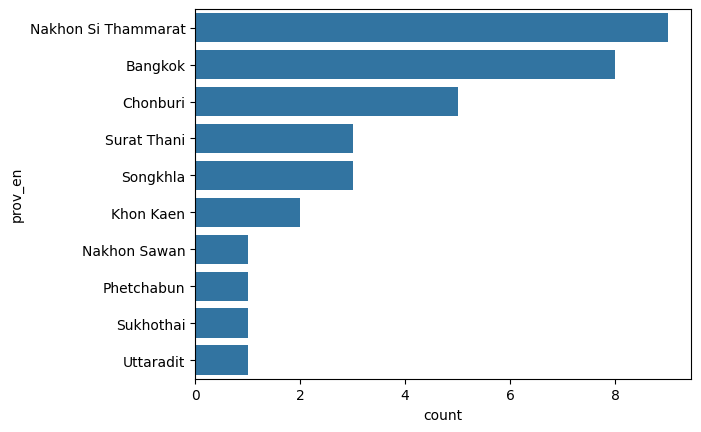

In [143]:
df_cases = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en',]].copy()
df_cases["rank"] = df_cases.groupby("budgetYear")["arrestAll_case"].rank(method = "min", ascending = False)
top_3 = df_cases[df_cases["rank"] <= 3].copy()
top_10 = top_3["prov_en"].value_counts(ascending = False).head(10).index
top_3 = top_3[top_3["prov_en"].isin(top_10)].copy()
sns.countplot(
    data = top_3,
    y = "prov_en",
    order = top_3["prov_en"].value_counts().index,
);

##### แล้วทำไมคนภาคใต้ถึงมีสัดส่วนนักดื่มน้อยที่สุด?

จากการวิเคราะห์ค้นพบว่ามีสาเหตุเนื่องมาจากภาคใต้เป็นภาคที่มี<b>สัดส่วนคนนับถือศาสนาอิสลามมากที่สุด</b> 
ซึ่งเป็นศาสนาที่มีข้อห้ามในการข้องเกี่ยวกับสิ่งมึนเมาโดยเด็ดขาด แต่ทั้งนี้ก็ขึ้นอยู่กับความเคร่งครัดของแต่ละบุคคล ท้องที่ หรือจังหวัดนั้น ๆ ด้วยเช่นกันนอกจากนี้ยังมี<b>เรื่องของความปลอดภัย</b>ที่กระทบต่อการสังสรรค์หรือรื่นเริง เช่น จังหวัดนครศรีธรรมราช จังหวัดชายแดนภาคใต้ ทำให้ผู้คนในภาคใต้ไม่ตัดสินใจเลือกที่จะมานั่งดื่มกินกัน 

ในส่วนของภาคเหนือซึ่งมีสัดส่วนนักดื่มเยอะเป็นอันดับหนึ่งของประเทศนั้น คาดว่าเป็นเพราะภาคเหนือ<b>เป็นแหล่งรวมวัฒนธรรมประเพณีที่มีความหลากหลาย</b> ส่งผลให้เกิดการดื่มเฉลิมฉลองในบางเทศกาลหรืองานรื่นเริงบ่อยครั้ง และด้วย<b>บรรยากาศที่ค่อนข้างหนาว ทัศนียภาพส่วนใหญ่เป็นภูเขา ประกอบกับภูมิศาสตร์ต่าง ๆ ที่ไม่เอื้ออำนวย</b>ให้ทำกิจกรรมอื่น ๆ มากนัก ทำให้ผู้คนในชุมชนจึงมักเลือกการสังสรรค์เป็นกิจกรรมในการเพิ่มระดับความสัมพันธ์ของพวกเขา

รวมทั้งด้วย<b>สภาพเศรษฐกิจในระดับภาคยังมีความกระจุกและเติบโตน้อย</b> ส่งผลให้สัดส่วนคนจนมีเยอะ ซึ่งสภาพเศรษฐกิจเหล่านี้เองที่ส่งผลต่อระดับความเครียดของผู้คนและอาจทำให้เกิดการดื่มเพื่อบรรเทาความเครียดได้เช่นกัน ประกอบกันจังหวัดต่างๆ ในภาคเหนือ มีการทำสุราท้องถิ่นมากเป็นอันดับต้น ๆ ของประเทศอีกด้วย โดยจังหวัดน่านเป็นจังหวัดที่มีสัดส่วนนักดื่มเยอะมากที่สุดในประเทศไทย โดยมีมากถึง 43% เลยทีเดียว 

---

### <u>สรุป</u>


งานในครั้งนี้มุ่งเน้นไปที่การศึกษาปัจจัยบางประการที่ส่งผลต่อปัญหายาเสพติดในประเทศไทย 

ถึงแม้ว่าปัจจัยที่เรายกมาในงานครั้งนี้ จะมีส่วนที่ส่งผลต่อปัญหายาเสพติดของประเทศไทยได้ แต่ก็ไม่ใช่ปัจจัยทั้งหมด เป็นเพียงแค่ปัจจัยภายนอกและเพียงส่วนหนึ่งเท่านั้นยังมีอีกหลายปัจจัย ไม่ว่าจะเป็นสภาพเศรษฐกิจ สังคมที่เราอยู่ ครอบครัว หรือ การศึกษา

แต่สุดท้ายแล้วอีกส่วนสำคัญที่มีผลต่อปัญหายาเสพติดนั้นคือเรื่องปัจจัยภายใน เป็นเรื่องปัจเจกบุคคล การเลือกที่จะมาข้องเกี่ยวกับยาเสพติดล้วนเป็นการตัดสินใจของคนๆนั้นเองทั้งนั้น ดังนั้นเราควรจะมาให้ความสำคัญกับการปลูกฝัง ปลูกจิตสำนึกให้คนในชาติขึ้น

### <u>ข้อเสนอแนะ</u>


1. ชุมชนเข้มแข็ง 

    - ส่งเสริมการมีส่วนร่วมของคนในชุมชน ร่วมกันสอดส่องดูแล ป้องกัน ปราบปราม
    - สร้างกิจกรรมสร้างสรรค์ เสริมสร้างทักษะชีวิต ให้เด็กและเยาวชนมีภูมิคุ้มกันต่อยาเสพติด
    - เน้นการให้ความรู้แก่ครอบครัว เกี่ยวกับอันตรายของยาเสพติด และวิธีการสังเกตพฤติกรรมของบุตรหลาน
    - สนับสนุนเครือข่ายอาสาสมัครในชุมชน ทำหน้าที่เป็นพี่เลี้ยง ดูแลเด็กและเยาวชน
    <br><br>

2. โอกาสใหม่

    - ทำให้สถานบำบัดเป็นที่ที่เข้าถึงได้ เพิ่มจำนวนสถานบำบัดให้เพียงพอ กระจายตามพื้นที่ต่างๆ
    - พัฒนาระบบการบำบัดให้มีประสิทธิภาพ เน้นการฟื้นฟูทั้งร่างกายและจิตใจ
    - สนับสนุนการฝึกอาชีพ ให้ผู้เข้ารับการบำบัดสามารถกลับมาประกอบอาชีพสุจริต
    คืนโอกาสให้ผู้ติดยากลับมาใช้ชีวิตในสังคม
     <br><br>

3. กฎหมายที่เข้มข้น และจริงจัง

    - เพิ่มบทลงโทษ และมีกระบวนการที่จริงจัง ตำรวจเอางานเอาการ
    กวาดล้างผู้ค้ารายใหญ่ เครือข่ายยาเสพติด
    - พัฒนาระบบสืบสวนสอบสวน ปิดช่องโหว่ เพื่อป้องกันการลักลอบค้ายา
    และเน้นการปราบปรามยาเสพติดในพื้นที่เสี่ยง แหล่งท่องเที่ยว ชุมชนแออัด
    - รวมไปถึงร่วมมือกับประเทศเพื่อนบ้าน ปิดกั้นเส้นทางการลำเลียงยา
     <br><br>

---
### References
- https://alcoholstudy.in.th/index.php?ct=report_drinker_province&proc=main&year=2564&chart_id=5&len=10&page=0&key=
- https://www.thaihealth.or.th/%E0%B8%AB%E0%B9%88%E0%B8%A7%E0%B8%87%E0%B8%9B%E0%B8%B1%E0%B8%8D%E0%B8%AB%E0%B8%B2%E0%B8%A2%E0%B8%B2%E0%B9%80%E0%B8%AA%E0%B8%9E%E0%B8%95%E0%B8%B4%E0%B8%94-%E0%B8%A3%E0%B8%B0%E0%B8%9A%E0%B8%B2%E0%B8%94/
- https://www.phufaresthome.com/blog/drug-issue-in-thai-teenager/
- https://www.agenda.co.th/social/alcohol-consumption-thailand/
- https://www.parliament.go.th/ewtadmin/ewt/parliament_parcy/ewt_dl_link.php?nid=45110
- https://www.bbc.com/thai/40024683
- https://mgronline.com/south/detail/9620000106545
- https://catalog.nso.go.th/en/dataset/0706_02_0003/resource/71a8b59d-2a0f-4f9d-b2f5-c8e6b0730ca3